# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"city name: {city}, city ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record doesn't exist, searching next")




city name: puerto ayora, city ID: 3652764
city name: shingu, city ID: 1847947
city name: bluff, city ID: 2206939
city name: hofn, city ID: 2630299
city name: anchorage, city ID: 5879400
That record doesn't exist, searching next
city name: mataura, city ID: 6201424
city name: gisborne, city ID: 2206854
city name: nara, city ID: 1855612
city name: ushuaia, city ID: 3833367
city name: noumea, city ID: 2139521
city name: tabou, city ID: 2281120
city name: cape town, city ID: 3369157
city name: new norfolk, city ID: 2155415
city name: altea, city ID: 2521804
city name: mpika, city ID: 905846
city name: hilo, city ID: 5855927
city name: cravo norte, city ID: 3685702
city name: cabo san lucas, city ID: 3985710
That record doesn't exist, searching next
city name: punta arenas, city ID: 3874787
city name: boke, city ID: 2422924
city name: bastia, city ID: 3034639
city name: vaini, city ID: 4032243
city name: kapaa, city ID: 5848280
That record doesn't exist, searching next
city name: kidal, cit

city name: dingle, city ID: 1714733
city name: iracoubo, city ID: 3381428
city name: the valley, city ID: 3573374
city name: ous, city ID: 1495812
city name: lorengau, city ID: 2092164
city name: glenwood springs, city ID: 5423092
city name: araouane, city ID: 2460954
city name: richards bay, city ID: 962367
city name: hasaki, city ID: 2112802
city name: ust-kuyga, city ID: 2013921
city name: zabol, city ID: 1121143
city name: suicheng, city ID: 1793899
city name: ahipara, city ID: 2194098
city name: lere, city ID: 2332079
city name: antalaha, city ID: 1071296
city name: torbay, city ID: 6167817
city name: dulyapino, city ID: 564200
city name: flinders, city ID: 6255012
That record doesn't exist, searching next
city name: acapulco, city ID: 3533462
city name: sao sebastiao, city ID: 3448257
That record doesn't exist, searching next
city name: laguna, city ID: 5364271
city name: mahebourg, city ID: 934322
city name: wilmington, city ID: 4499379
city name: teruel, city ID: 3108125
city n

city name: ankpa, city ID: 2349788
city name: san luis, city ID: 3837056
city name: poum, city ID: 2138555
That record doesn't exist, searching next
city name: caravelas, city ID: 3466980
city name: lahad datu, city ID: 1733953
That record doesn't exist, searching next
city name: rio grande, city ID: 3451138
city name: nhulunbuy, city ID: 2064735
city name: siraha, city ID: 1282770
city name: husavik, city ID: 2629833
city name: tura, city ID: 1254046
city name: kruisfontein, city ID: 986717
city name: touros, city ID: 3386213
city name: tarko-sale, city ID: 1490085
city name: sarangani, city ID: 1687186
city name: dali, city ID: 1814093
city name: pisco, city ID: 3932145
city name: esmeraldas, city ID: 3464008
city name: petropavlovka, city ID: 2017979
city name: kutum, city ID: 371745
city name: sayaxche, city ID: 3588984
city name: bom jesus, city ID: 3405304
city name: aden, city ID: 415189
city name: henties bay, city ID: 3356832
city name: general pico, city ID: 3855075
city name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
new_df = pd.DataFrame({'city id': city_id_list, 'city': city_name_list, 
            'country': country_list, 'lat': lat_list, "lng": lng_list,
            "temperature": temp_list, "humidity": humidity_list, "clouds": clouds_list, 
            "wind speed": wind_speed_list})
new_df.head()

,city id,city,country,lat,lng,temperature,humidity,clouds,wind speed
0,3652764,Puerto Ayora,EC,-0.7393,-90.3518,84.07,74,40,16.11
1,1847947,Shingū,JP,33.7333,135.9833,40.28,70,100,7.45
2,2206939,Bluff,NZ,-46.6000,168.3333,55.99,97,100,1.99
3,2630299,Hofn,IS,64.2539,-15.2082,44.60,93,90,17.27
4,5879400,Anchorage,US,61.2181,-149.9003,27.55,80,90,1.79


In [15]:
new_df.to_csv('output_data_file.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_df2 = new_df.loc[(
    new_df["humidity"] > 100)]
new_df2

,city id,city,country,lat,lng,temperature,humidity,clouds,wind speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

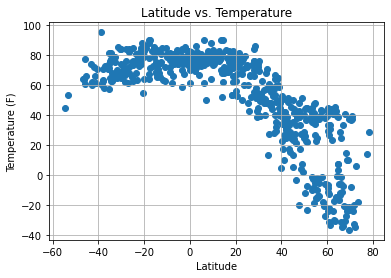

In [27]:
# Build a scatter plot for each data type
plt.scatter(new_df["lat"], new_df["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

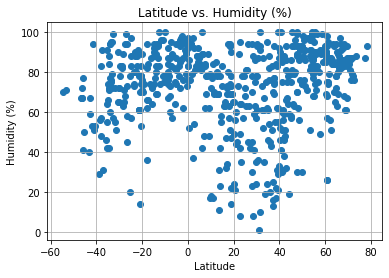

In [28]:
# Build a scatter plot for each data type
plt.scatter(new_df["lat"], new_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

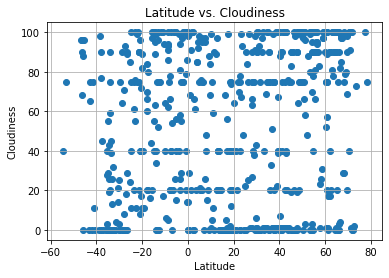

In [29]:
# Build a scatter plot for each data type
plt.scatter(new_df["lat"], new_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

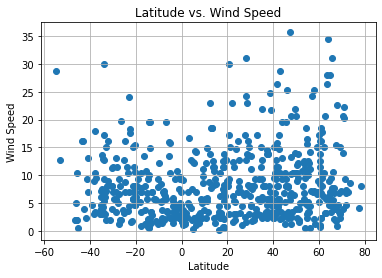

In [30]:
# Build a scatter plot for each data type
plt.scatter(new_df["lat"], new_df["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [43]:
# Create Northern and Southern Hemisphere DataFrames
north = new_df['lat'] > 0
south = new_df['lat'] < 0
northern_hemisphere = new_df[north]
southern_hemisphere = new_df[south]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

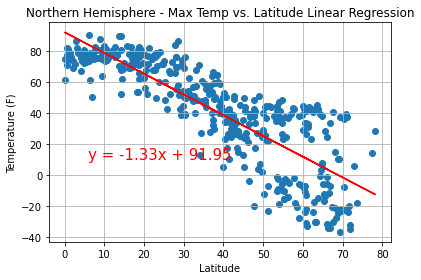

In [87]:
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.savefig("Northern Hemisphere Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

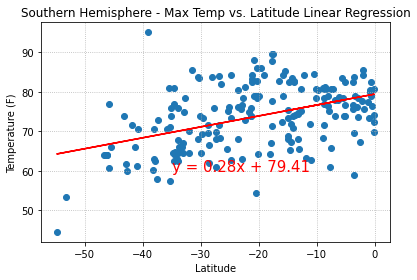

In [88]:
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(which='major', linestyle=':')
plt.tight_layout()
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

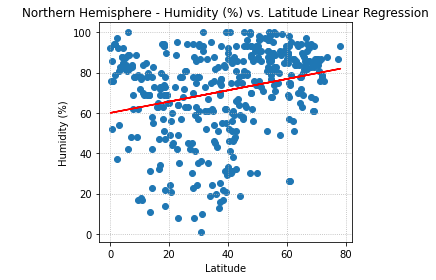

In [89]:
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(which='major', linestyle=':')
plt.tight_layout()
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

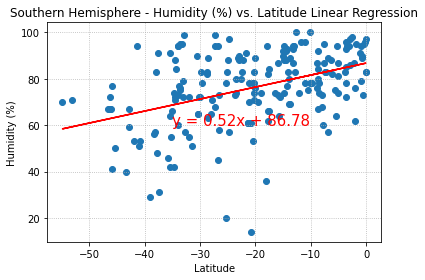

In [90]:
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(which='major', linestyle=':')
plt.tight_layout()
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

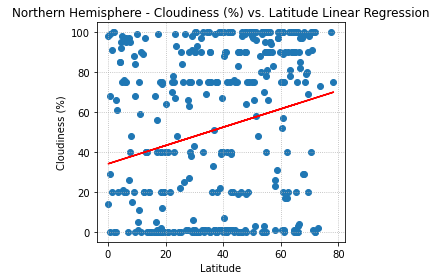

In [91]:
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(which='major', linestyle=':')
plt.tight_layout()
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

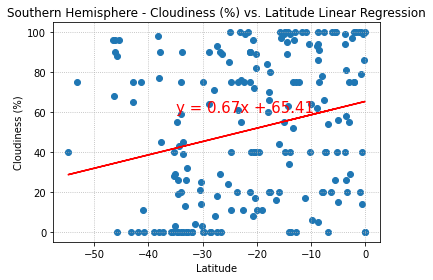

In [92]:
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(which='major', linestyle=':')
plt.tight_layout()
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

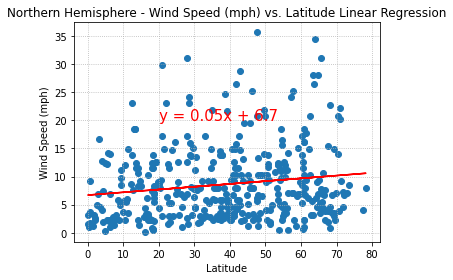

In [93]:
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(which='major', linestyle=':')
plt.tight_layout()
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

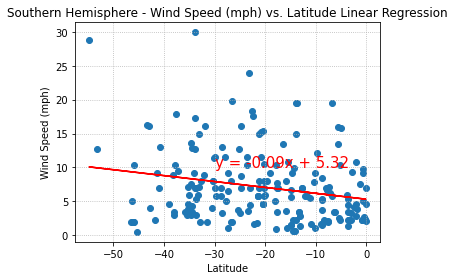

In [94]:
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(which='major', linestyle=':')
plt.tight_layout()
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()